In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliary import *
import scipy 

In [2]:
data = "../Data/data_statistics/blood_donors.csv"

df = pd.read_csv(data)
df.head()

donor_id blood_type
0         1         a+
1         2         a+
2         3         a+
3         4         a+
4         5         a+

In [3]:
df.describe()

donor_id
count  60.000000
mean   30.500000
std    17.464249
min     1.000000
25%    15.750000
50%    30.500000
75%    45.250000
max    60.000000

In [4]:
df_frequency = pd.DataFrame()

df_frequency['frequency'] = df['blood_type'].value_counts().sort_index()
df_frequency['relative_frequency'] = df['blood_type'].value_counts(normalize=True).sort_index()
df_frequency['cummulative_frequency'] = df_frequency['frequency'].cumsum()
df_frequency['cummulative_relative_frequency'] = df_frequency['relative_frequency'].cumsum()


In [5]:
df_frequency

frequency  relative_frequency  cummulative_frequency  \
blood_type                                                         
a+                 15            0.250000                     15   
a-                  2            0.033333                     17   
ab+                 1            0.016667                     18   
ab-                 1            0.016667                     19   
b+                  6            0.100000                     25   
b-                  1            0.016667                     26   
o+                 32            0.533333                     58   
o-                  2            0.033333                     60   

            cummulative_relative_frequency  
blood_type                                  
a+                                0.250000  
a-                                0.283333  
ab+                               0.300000  
ab-                               0.316667  
b+                                0.416667  
b-                                0.433333  
o+                                0.966667  
o-                                1.000000

In [6]:
df

donor_id blood_type
0          1         a+
1          2         a+
2          3         a+
3          4         a+
4          5         a+
5          6         a+
6          7         a+
7          8         a+
8          9         a+
9         10         a+
10        11         a+
11        12         a+
12        13         a+
13        14         a+
14        15         a+
15        16         a-
16        17         a-
17        18         b+
18        19         b+
19        20         b+
20        21         b+
21        22         b+
22        23         b+
23        24         b-
24        25        ab+
25        26        ab-
26        27         o+
27        28         o+
28        29         o+
29        30         o+
30        31         o+
31        32         o+
32        33         o+
33        34         o+
34        35         o+
35        36         o+
36        37         o+
37        38         o+
38        39         o+
39        40         o+
40        41         o+
41        42         o+
42        43         o+
43        44         o+
44        45         o+
45        46         o+
46        47         o+
47        48         o+
48        49         o+
49        50         o+
50        51         o+
51        52         o+
52        53         o+
53        54         o+
54        55         o+
55        56         o+
56        57         o+
57        58         o+
58        59         o-
59        60         o-

In [7]:
df_func = frequency_table(df,"blood_type")
df_func

frequency  relative_frequency  cummulative_frequency  \
blood_type                                                         
a+                 15            0.250000                     15   
a-                  2            0.033333                     17   
ab+                 1            0.016667                     18   
ab-                 1            0.016667                     19   
b+                  6            0.100000                     25   
b-                  1            0.016667                     26   
o+                 32            0.533333                     58   
o-                  2            0.033333                     60   

            cummulative_relative_frequency  
blood_type                                  
a+                                0.250000  
a-                                0.283333  
ab+                               0.300000  
ab-                               0.316667  
b+                                0.416667  
b-                                0.433333  
o+                                0.966667  
o-                                1.000000

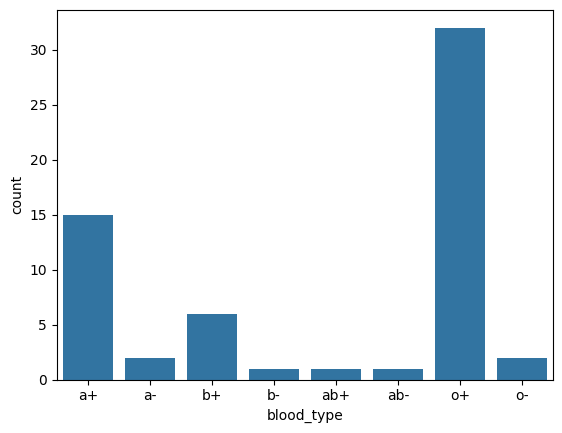

In [8]:
sns.countplot(data = df, x= 'blood_type');

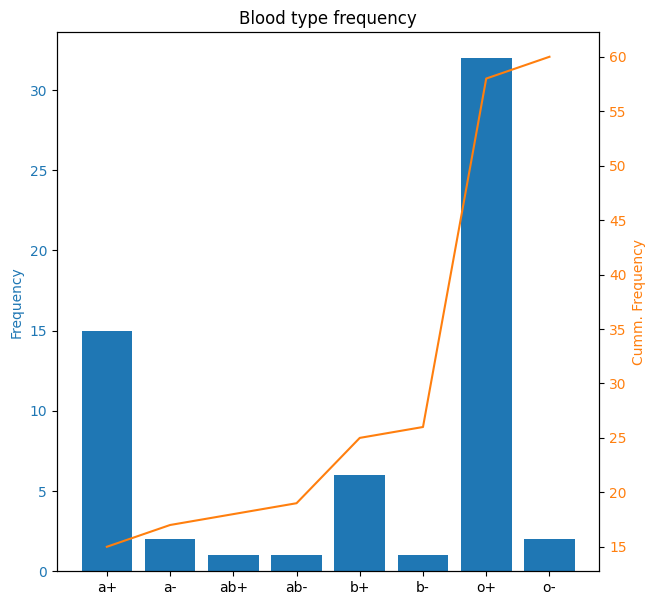

In [9]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(7,7))

ax2 = ax.twinx()

ax.bar( df_func.index, df_func['frequency'], color = 'C0')
ax2.plot(df_func.index, df_func['cummulative_frequency'], color='C1')

ax.set_ylabel('Frequency', color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax2.set_ylabel('Cumm. Frequency', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_locator(mtick.MultipleLocator(base=5))

plt.title('Blood type frequency')


plt.show()

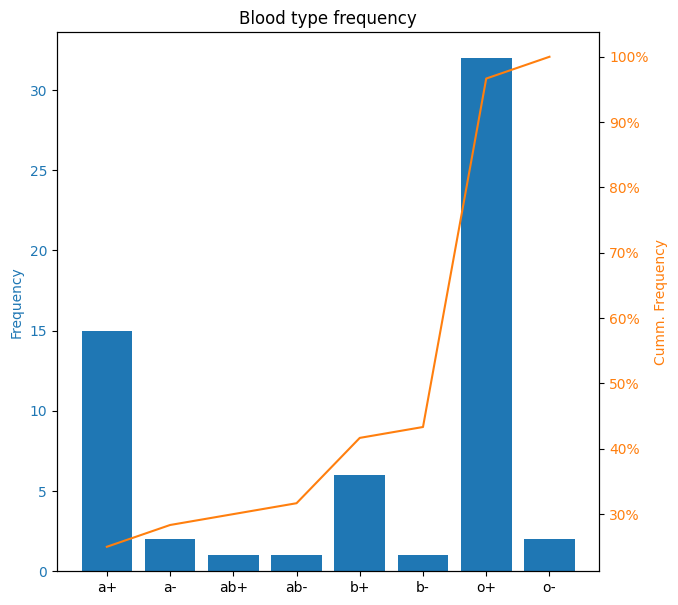

In [10]:
# import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(7,7))

ax2 = ax.twinx()

ax.bar( df_func.index, df_func['frequency'], color = 'C0')
ax2.plot(df_func.index, df_func['cummulative_relative_frequency'], color='C1')

ax.set_ylabel('Frequency', color='C0')
ax.tick_params(axis='y', labelcolor='C0')
ax2.set_ylabel('Cumm. Frequency', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('Blood type frequency')


plt.show()

## Pareto

In [11]:
df_cartoes = pd.read_csv("../Data/data_statistics/cartoes.csv")
df_cartoes

tipo_de_defeito  frequencia
0            amassado          71
1           perfurado          28
2  impressao_ilegivel          12
3  caracteres_errados          20
4     numeros_errados          44
5              outros           6

In [12]:
df_cartoes = df_cartoes.sort_values(by='frequencia', ascending=False).reset_index(drop=True)
df_cartoes['freq. rel'] = df_cartoes['frequencia'] / df_cartoes['frequencia'].sum()
df_cartoes['Cumm. Freq.'] = df_cartoes['frequencia'].cumsum()
df_cartoes['Cumm. Rel. Freq.'] = df_cartoes['freq. rel'].cumsum()

#can reuse the function I've created! With some modification because I already have the frequency for this dataset

df_cartoes

tipo_de_defeito  frequencia  freq. rel  Cumm. Freq.  Cumm. Rel. Freq.
0            amassado          71   0.392265           71          0.392265
1     numeros_errados          44   0.243094          115          0.635359
2           perfurado          28   0.154696          143          0.790055
3  caracteres_errados          20   0.110497          163          0.900552
4  impressao_ilegivel          12   0.066298          175          0.966851
5              outros           6   0.033149          181          1.000000

In [13]:
df_pareto = frequency_table(df_cartoes, 'frequencia', frequency_column= True)

In [14]:
df_pareto = df_pareto.set_index(df_cartoes['tipo_de_defeito'])

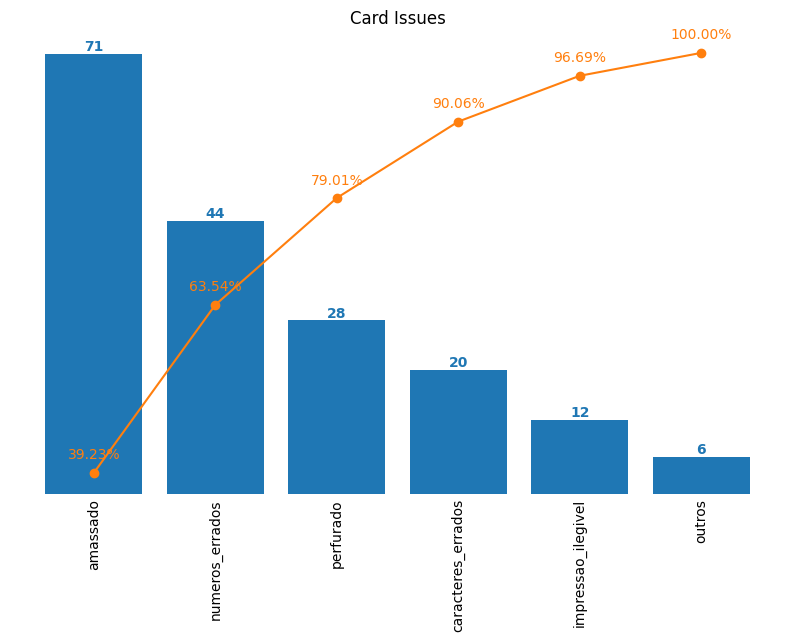

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()

ax.bar( df_pareto.index, df_pareto['frequency'], color = 'C0')
ax2.plot(df_pareto.index, df_pareto['cummulative_relative_frequency'], color='C1', marker = 'o')

ax.bar_label(ax.containers[0], color='C0', fontweight='bold', padding=0.2)

for i, percent in enumerate(df_pareto['cummulative_relative_frequency']):
    ax2.annotate(f"{percent:.2%}", (i,percent), xytext=(0,10), textcoords='offset points', ha='center', color='C1')


# ax.set_ylabel('Frequency', color='C0')
ax.tick_params(axis='y', left=False, labelleft= False)#labelcolor='C0')
ax.tick_params(axis='x', rotation=90, size=0)

# ax2.set_ylabel('Cumm. Frequency', color='C1')
ax2.tick_params(axis='y', right=False, labelright= False) #labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('Card Issues')

for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.show()

## Interval

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df_grades = pd.read_csv("../Data/data_statistics/grades.csv")
df_grades

grades
0      4.2
1      3.9
2      5.7
3      6.5
4      4.6
5      6.3
6      8.0
7      4.4
8      5.0
9      5.5
10     6.0
11     4.5
12     5.0
13     7.2
14     6.4
15     7.2
16     5.0
17     6.8
18     4.7
19     3.5
20     6.0
21     7.4
22     8.8
23     3.8
24     5.5
25     5.0
26     6.6
27     7.1
28     5.3
29     4.7

In [17]:
df_grades.value_counts()

grades
5.0       4
4.7       2
5.5       2
6.0       2
7.2       2
3.8       1
3.5       1
4.6       1
4.5       1
4.4       1
4.2       1
3.9       1
5.3       1
6.3       1
5.7       1
6.4       1
6.5       1
6.8       1
6.6       1
7.1       1
7.4       1
8.0       1
8.8       1
Name: count, dtype: int64

In [18]:
df_grades['grades'].value_counts(bins=10).sort_index()

(3.494, 4.03]    3
(4.03, 4.56]     3
(4.56, 5.09]     7
(5.09, 5.62]     3
(5.62, 6.15]     3
(6.15, 6.68]     4
(6.68, 7.21]     4
(7.21, 7.74]     1
(7.74, 8.27]     1
(8.27, 8.8]      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

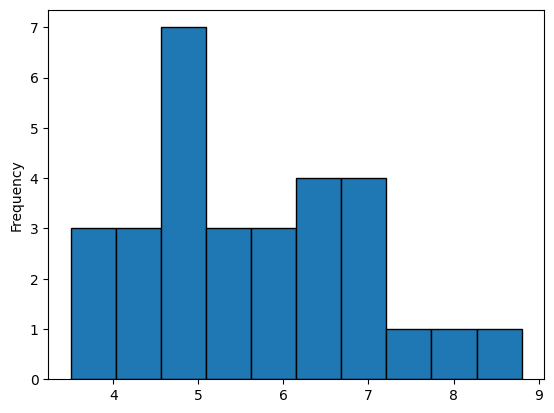

In [19]:
df_grades['grades'].plot.hist(bins=10, edgecolor='black')   

In [20]:
''' We use Sturges' rule to calculate the number of bins, but there are other rules that can be used 
like Scott's rule, Freedman-Diaconis' rule, etc.'''

k = 1 + np.log2(df_grades.shape[0]) 

In [21]:
print(np.ceil(k))

6.0


In [22]:
#Calculate the amplitude of the bins
amplitude = (df_grades['grades'].max() - df_grades['grades'].min()) / k

amplitude

np.float64(0.8972571802735417)

In [23]:
df_grades['grades'].value_counts(bins = int(k)).sort_index()

(3.494, 4.56]     6
(4.56, 5.62]     10
(5.62, 6.68]      7
(6.68, 7.74]      5
(7.74, 8.8]       2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

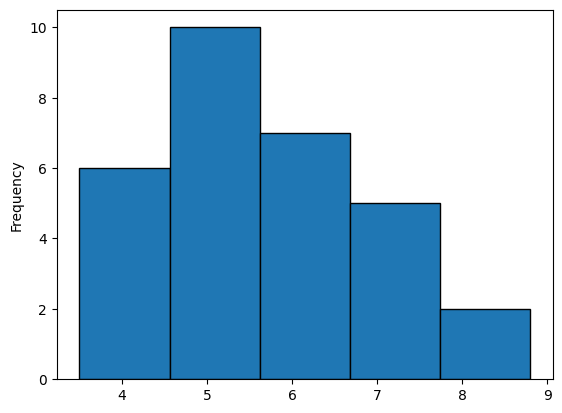

In [24]:
df_grades['grades'].plot.hist(bins=int(k), edgecolor='black')

In [25]:
# numpy already has a function to calculate the number of bins
# https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html

bins = np.histogram_bin_edges(df_grades['grades'], bins='sturges')

In [26]:
bins

array([3.5       , 4.38333333, 5.26666667, 6.15      , 7.03333333,
       7.91666667, 8.8       ])

<Axes: ylabel='Frequency'>

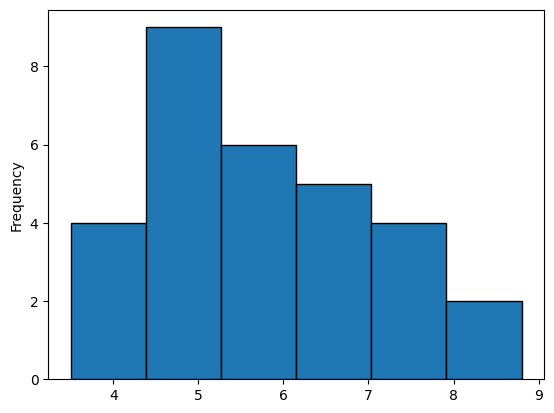

In [27]:
df_grades['grades'].plot.hist(bins=bins, edgecolor='black')

In [28]:
bin_size = bins[1:] - bins[:-1]
bin_size

array([0.88333333, 0.88333333, 0.88333333, 0.88333333, 0.88333333,
       0.88333333])

In [29]:
# The include_lowest parameter includes the lowest value in the bin, opens the interval on the right
pd.cut(df_grades['grades'], bins=bins, include_lowest=True).value_counts().sort_index()

grades
(3.499, 4.383]    4
(4.383, 5.267]    9
(5.267, 6.15]     6
(6.15, 7.033]     5
(7.033, 7.917]    4
(7.917, 8.8]      2
Name: count, dtype: int64

In [30]:
# 0,88 as interval is not good, we can change the interval to 0.5 keeping the same bin size

interval_size_int = np.zeros(len(bins))
interval_size_int

array([0., 0., 0., 0., 0., 0., 0.])

In [31]:
interval_size_int[1:] = np.ceil(bin_size)

In [32]:
interval_size_int

array([0., 1., 1., 1., 1., 1., 1.])

In [33]:
interval_size_int.cumsum()

array([0., 1., 2., 3., 4., 5., 6.])

In [34]:
bin_size = bins[0] + np.cumsum(interval_size_int)
bin_size

array([3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [35]:
pd.cut(df_grades['grades'], bins=bin_size,  right=False).value_counts().sort_index().to_frame()

count
grades           
[3.5, 4.5)      5
[4.5, 5.5)      9
[5.5, 6.5)      7
[6.5, 7.5)      7
[7.5, 8.5)      1
[8.5, 9.5)      1

In [36]:
df_grades.head()

grades
0     4.2
1     3.9
2     5.7
3     6.5
4     4.6

## Resume Measures

### Position or Location

In [37]:
# mean, median, mode -> Central Tendency
# Quartis, Decis -> Separating measures
df_carrots = pd.read_csv('../Data/data_statistics/carrots.csv')

In [38]:
df_carrots.head()

carrots
0     45.0
1     44.5
2     44.0
3     45.0
4     46.5

In [39]:
df_carrots.mode() #Value that appears most times

carrots
0     45.0

In [40]:
df_carrots.value_counts() #First value = Mode

carrots
45.0       4
44.5       2
44.9       2
46.2       2
44.8       1
44.0       1
44.7       1
45.4       1
45.7       1
45.6       1
45.8       1
46.0       1
46.3       1
46.5       1
Name: count, dtype: int64

In [41]:
df_carrots.mean()

carrots    45.3
dtype: float64

In [42]:
df_carrots.describe() #Can see the mean here

carrots
count  20.000000
mean   45.300000
std     0.700376
min    44.000000
25%    44.875000
50%    45.000000
75%    45.850000
max    46.500000

In [43]:
# Divide that in 2 halfs, 50% is above and 50% is below
df_carrots.median()

carrots    45.0
dtype: float64

In [44]:
df_carrots.describe() #Median is represented by de 50%

carrots
count  20.000000
mean   45.300000
std     0.700376
min    44.000000
25%    44.875000
50%    45.000000
75%    45.850000
max    46.500000

### Separating measures

In [45]:
df_carrots.describe()

carrots
count  20.000000
mean   45.300000
std     0.700376
min    44.000000
25%    44.875000
50%    45.000000
75%    45.850000
max    46.500000

In [46]:
#Decile
df_carrots['carrots'].quantile(np.arange(0,1.1,0.1))

0.0    44.00
0.1    44.50
0.2    44.78
0.3    44.90
0.4    45.00
0.5    45.00
0.6    45.48
0.7    45.73
0.8    46.04
0.9    46.21
1.0    46.50
Name: carrots, dtype: float64

In [47]:
#Percentile
df_carrots['carrots'].quantile(np.arange(0,1.01,0.01))

0.00    44.000
0.01    44.095
0.02    44.190
0.03    44.285
0.04    44.380
         ...  
0.96    46.348
0.97    46.386
0.98    46.424
0.99    46.462
1.00    46.500
Name: carrots, Length: 101, dtype: float64

In [48]:
df_carrots_ordered = df_carrots['carrots'].sort_values().reset_index(drop=True).to_frame()

In [49]:
df_carrots_ordered['quartile'] = pd.qcut(df_carrots_ordered['carrots'], 4)

In [50]:
df_carrots_ordered['quartile'].cat.categories

IntervalIndex([(43.999, 44.875], (44.875, 45.0], (45.0, 45.85], (45.85, 46.5]], dtype='interval[float64, right]')

In [51]:
df_carrots_ordered['quartile_label'] = pd.qcut(
    df_carrots_ordered['carrots']
    , 4
    ,labels= ['0-25%','25-50%','50-75%','75-100%']
)

In [52]:
df_carrots_ordered

carrots          quartile quartile_label
0      44.0  (43.999, 44.875]          0-25%
1      44.5  (43.999, 44.875]          0-25%
2      44.5  (43.999, 44.875]          0-25%
3      44.7  (43.999, 44.875]          0-25%
4      44.8  (43.999, 44.875]          0-25%
5      44.9    (44.875, 45.0]         25-50%
6      44.9    (44.875, 45.0]         25-50%
7      45.0    (44.875, 45.0]         25-50%
8      45.0    (44.875, 45.0]         25-50%
9      45.0    (44.875, 45.0]         25-50%
10     45.0    (44.875, 45.0]         25-50%
11     45.4     (45.0, 45.85]         50-75%
12     45.6     (45.0, 45.85]         50-75%
13     45.7     (45.0, 45.85]         50-75%
14     45.8     (45.0, 45.85]         50-75%
15     46.0     (45.85, 46.5]        75-100%
16     46.2     (45.85, 46.5]        75-100%
17     46.2     (45.85, 46.5]        75-100%
18     46.3     (45.85, 46.5]        75-100%
19     46.5     (45.85, 46.5]        75-100%

<Axes: xlabel='carrots'>

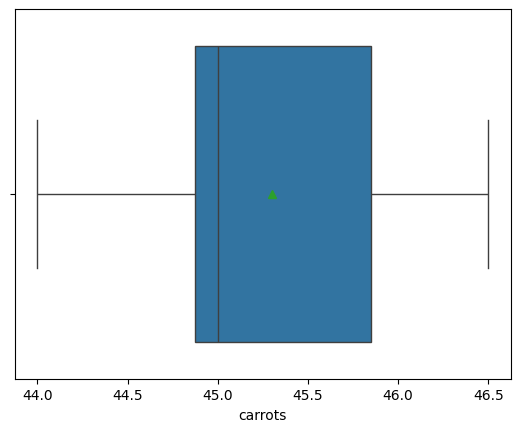

In [53]:
sns.boxplot(data = df_carrots, x = 'carrots', showmeans=True, color = 'C0')

<Axes: xlabel='carrots', ylabel='Count'>

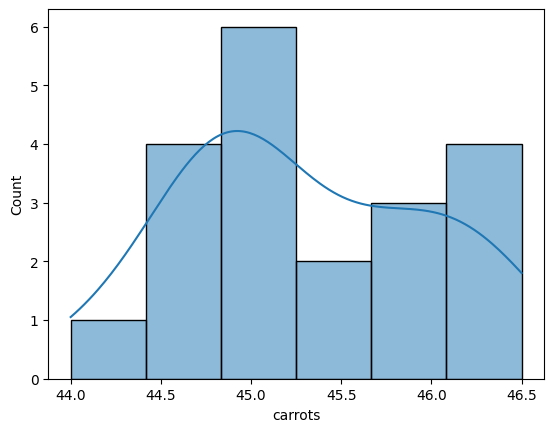

In [54]:
sns.histplot(data = df_carrots, x = 'carrots', kde=True)

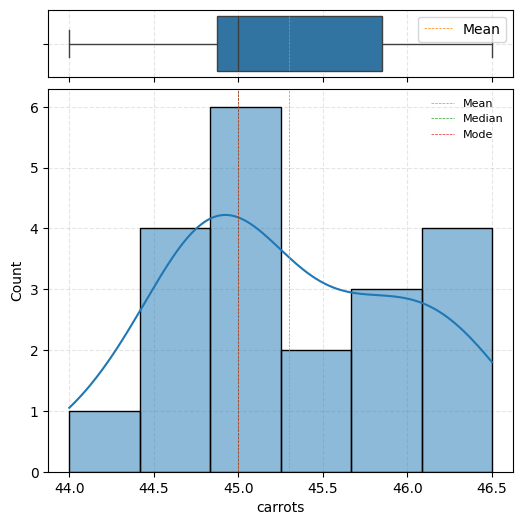

In [55]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2
    , ncols=1
    , gridspec_kw={
        "height_ratios":(0.15, 0.85),
        "hspace": 0.05
    }
    , sharex=True
    , figsize=(6, 6)
)

sns.boxplot(
    data = df_carrots, x = 'carrots' , showmeans=True , color = 'C0' , ax=ax1
    , meanline=True 
    , meanprops={
        'color': 'C1'
        , 'linewidth': 0.5
        , 'linestyle': '--'
        , 'label': 'Mean'
    }
)

sns.histplot(data = df_carrots, x = 'carrots', kde=True, ax=ax2)    

for ax in (ax1, ax2):
    ax.grid(True, linestyle='--', color = 'gray', alpha=0.2)
    ax.set_axisbelow(True)

ax2.axvline(df_carrots['carrots'].mean(), color='C1', linestyle='--', label='Mean', linewidth=0.5)
ax2.axvline(df_carrots['carrots'].median(), color='C2', linestyle='--', label='Median', linewidth=0.5)
ax2.axvline(df_carrots['carrots'].mode()[0], color='C3', linestyle='--', label='Mode', linewidth=0.5)

ax2.legend(loc='upper right', fontsize=8, frameon=False)

plt.show()

### Dispersion

In [56]:
#Show how much the data is spread, can be homogeneous or heterogeneous
#Absolute: Amplitude, Variance, Standard Deviation, Mean Deviation
#Relative: Coefficient of Variation, relative mean deviation

In [57]:
example = {
    "x": [70,70,70,70,70],
    "y": [68,69,70,71,72],
    "z": [5,15,50,120,160]
}

df_example = pd.DataFrame(example)

df_example

x   y    z
0  70  68    5
1  70  69   15
2  70  70   50
3  70  71  120
4  70  72  160

In [58]:
df_example.describe()

x          y          z
count   5.0   5.000000    5.00000
mean   70.0  70.000000   70.00000
std     0.0   1.581139   67.54628
min    70.0  68.000000    5.00000
25%    70.0  69.000000   15.00000
50%    70.0  70.000000   50.00000
75%    70.0  71.000000  120.00000
max    70.0  72.000000  160.00000

In [59]:
#Total Amplitude
#Sensible to extreme values
df_example.max() - df_example.min()

x      0
y      4
z    155
dtype: int64

In [60]:
#MAD - Mean Absolute Deviation 
#Calculate the mean and then the deviation of each value in relation to the mean
(df_example - df_example.mean()).abs().mean()

x     0.0
y     1.2
z    56.0
dtype: float64

In [61]:
#Variance
df_example.var()

x       0.0
y       2.5
z    4562.5
dtype: float64

In [62]:
#Standard Deviation, square root of the variance
df_example.std()

x     0.000000
y     1.581139
z    67.546280
dtype: float64

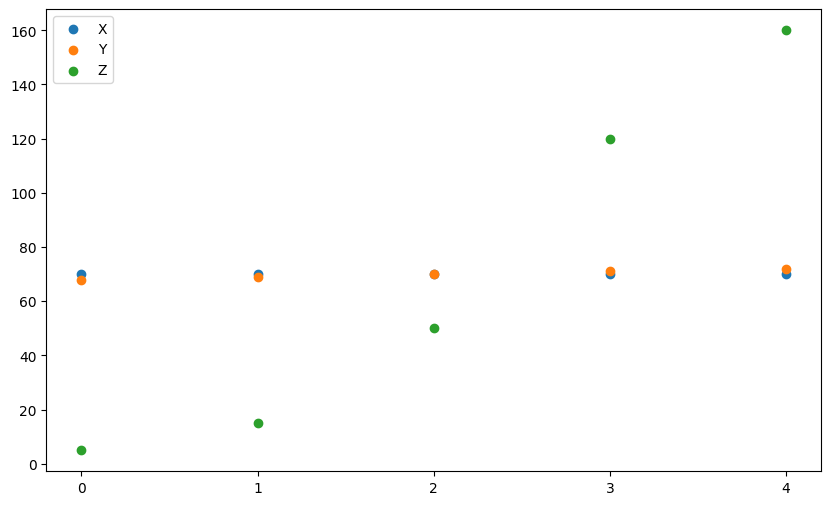

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_example.index, df_example['x'], label='X', color='C0')
ax.scatter(df_example.index, df_example['y'], label='Y', color='C1')
ax.scatter(df_example.index, df_example['z'], label='Z', color='C2')

ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [64]:
#coefficient of variation
df_example.std() / df_example.mean() * 100

x     0.000000
y     2.258770
z    96.494686
dtype: float64

In [65]:
#Returning to the Carrots dataset
df_carrots.describe()

carrots
count  20.000000
mean   45.300000
std     0.700376
min    44.000000
25%    44.875000
50%    45.000000
75%    45.850000
max    46.500000

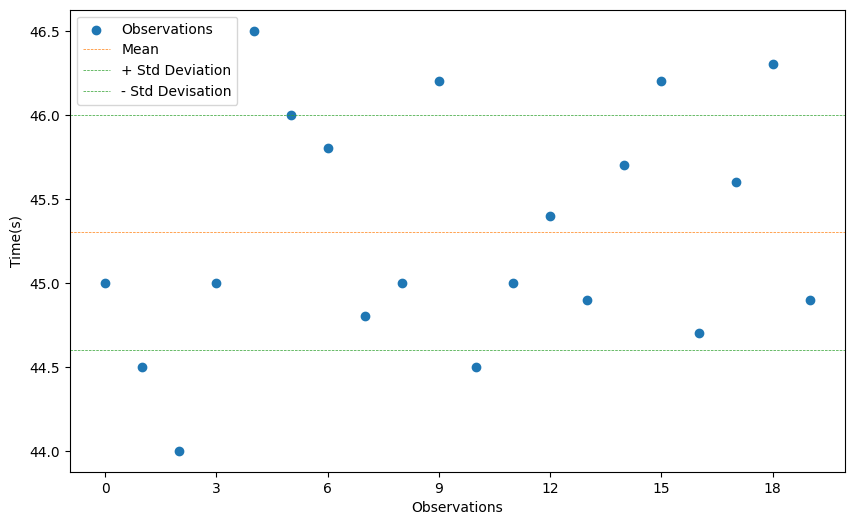

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_carrots.index, df_carrots['carrots'], label='Observations', color='C0')

ax.set_ylabel('Time(s)')
ax.set_xlabel('Observations')

ax.axhline(df_carrots['carrots'].mean(), color='C1', linestyle='--', label='Mean', linewidth=0.5)
ax.axhline(df_carrots['carrots'].mean() + df_carrots['carrots'].std(), color='C2', linestyle='--', label='+ Std Deviation', linewidth=0.5)
ax.axhline(df_carrots['carrots'].mean() - df_carrots['carrots'].std(), color='C2', linestyle='--', label='- Std Devisation', linewidth=0.5)

ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [67]:
df_grades.describe()

grades
count  30.000000
mean    5.686667
std     1.318498
min     3.500000
25%     4.700000
50%     5.500000
75%     6.575000
max     8.800000

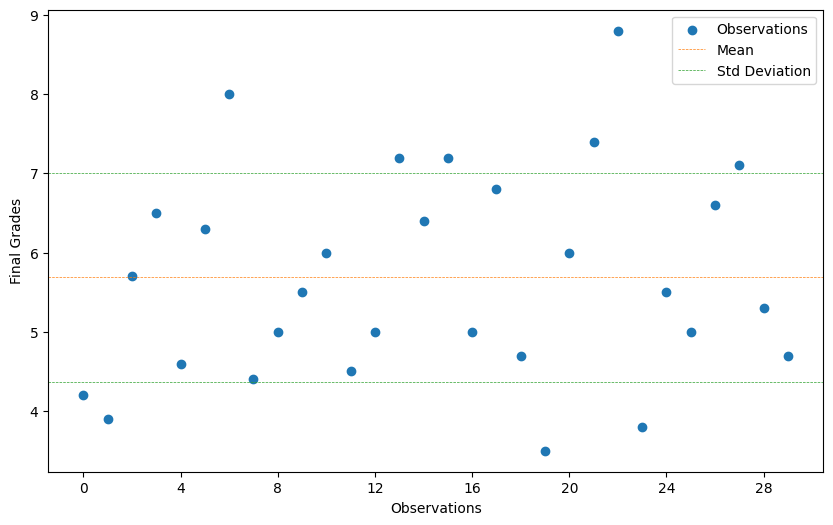

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_grades.index, df_grades['grades'], label='Observations', color='C0')

ax.set_ylabel('Final Grades')
ax.set_xlabel('Observations')

ax.axhline(df_grades['grades'].mean(), color='C1', linestyle='--', label='Mean', linewidth=0.5)
ax.axhline(df_grades['grades'].mean() + df_grades['grades'].std(), color='C2', label= 'Std Deviation', linestyle='--',  linewidth=0.5)
ax.axhline(df_grades['grades'].mean() - df_grades['grades'].std(), color='C2', linestyle='--',  linewidth=0.5)

ax.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

### Shape

In [69]:
from auxiliary import composition_hist_box

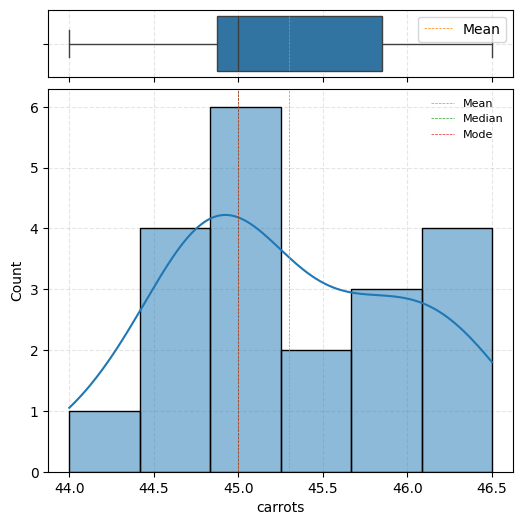

In [70]:
composition_hist_box(df_carrots,'carrots')

In [71]:
df_carrots.skew()

carrots    0.161368
dtype: float64

In [72]:
df_carrots.kurtosis()

carrots   -0.935288
dtype: float64

## Statistics Descriptive Bivariada

In [73]:
# Univariada faz com tabela de frequencia, bivariada faz com tabela de contingencia

data = "../Data/data_statistics/plano_saude.csv"

df_health = pd.read_csv(data)
df_health.head()

operadora satisfacao
0  Total Health      baixo
1  Total Health      baixo
2  Total Health      baixo
3  Total Health      baixo
4  Total Health      baixo

In [74]:
df_health.tail()

operadora satisfacao
195  Mena Saúde      medio
196  Mena Saúde       alto
197  Mena Saúde       alto
198  Mena Saúde       alto
199  Mena Saúde       alto

In [75]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   operadora   200 non-null    object
 1   satisfacao  200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [76]:
df_health.describe(include='object')

operadora satisfacao
count         200        200
unique          3          3
top     Viva Vida      baixo
freq           72         96

In [77]:
df_health['operadora'] = df_health['operadora'].astype('category')

satifaction_order = ['baixo', 'medio', 'alto']  
df_health['satisfacao'] = pd.Categorical(df_health['satisfacao'], categories=satifaction_order, ordered=True)

In [78]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   operadora   200 non-null    category
 1   satisfacao  200 non-null    category
dtypes: category(2)
memory usage: 796.0 bytes


In [79]:
pd.crosstab(df_health['operadora'], df_health['satisfacao'], margins=True, margins_name='Total')

satisfacao    baixo  medio  alto  Total
operadora                              
Mena Saúde       24     32     4     60
Total Health     40     16    12     68
Viva Vida        32     24    16     72
Total            96     72    32    200

In [80]:
pd.crosstab(
    df_health['operadora']
    , df_health['satisfacao']
    , margins=True
    , margins_name='Total'
    , normalize='all'
).style.format("{:.2%}")

In [81]:
pd.crosstab(
    df_health['operadora']
    , df_health['satisfacao']
    , margins=True
    , margins_name='Total'
    , normalize='index'
).style.format("{:.2%}")

In [82]:
pd.crosstab(
    df_health['operadora']
    , df_health['satisfacao']
    , margins=True
    , margins_name='Total'
    , normalize='columns'
).style.format("{:.2%}")

### SciPy

### Association Measures

In [83]:
pd.crosstab(df_health['operadora'], df_health['satisfacao'], margins=True, margins_name='Total')

satisfacao    baixo  medio  alto  Total
operadora                              
Mena Saúde       24     32     4     60
Total Health     40     16    12     68
Viva Vida        32     24    16     72
Total            96     72    32    200

In [84]:
pd.crosstab(
    df_health['operadora']
    , df_health['satisfacao']
    , margins=True
    , margins_name='Total'
    , normalize='index'
).style.format("{:.2%}")

In [85]:
from scipy.stats import chi2_contingency

In [86]:
result = chi2_contingency(pd.crosstab(df_health['operadora'], df_health['satisfacao']))
result

Chi2ContingencyResult(statistic=np.float64(15.860566448801741), pvalue=np.float64(0.003212084698153722), dof=4, expected_freq=array([[28.8 , 21.6 ,  9.6 ],
       [32.64, 24.48, 10.88],
       [34.56, 25.92, 11.52]]))

In [87]:
type(result)

scipy.stats.contingency.Chi2ContingencyResult

In [88]:
# result.statistic
# result.pvalue
# result.dof -- Degrees of Freedom
result.expected_freq

array([[28.8 , 21.6 ,  9.6 ],
       [32.64, 24.48, 10.88],
       [34.56, 25.92, 11.52]])

In [89]:
expected = result.expected_freq
expected

array([[28.8 , 21.6 ,  9.6 ],
       [32.64, 24.48, 10.88],
       [34.56, 25.92, 11.52]])

In [90]:
df_expected = pd.DataFrame(
    expected
    , index = df_health['operadora'].cat.categories
    , columns= df_health['satisfacao'].cat.categories
)

df_expected


baixo  medio   alto
Mena Saúde    28.80  21.60   9.60
Total Health  32.64  24.48  10.88
Viva Vida     34.56  25.92  11.52

In [91]:
result.pvalue #Low value, therefore we reject the null hypothesis, meaning that expected and observed frequencies are different. At least one pair of variables is dependent

np.float64(0.003212084698153722)

In [93]:
#Spearman Coefficient
df_spearman = pd.read_csv("../Data/data_statistics/grades_math_phys.csv", index_col= "student" )

df_spearman

math  physics
student               
1         4.7      6.6
2         6.3      5.1
3         7.5      6.9
4         5.0      7.1
5         4.4      3.5
6         3.7      4.6
7         8.5      6.8
8         8.2      7.5
9         3.5      4.2
10        4.0      3.3

In [94]:
df_spearman.describe()

math    physics
count  10.000000  10.000000
mean    5.580000   5.560000
std     1.899006   1.594574
min     3.500000   3.300000
25%     4.100000   4.300000
50%     4.850000   5.850000
75%     7.200000   6.875000
max     8.500000   7.500000

In [95]:
df_spearman.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   math     10 non-null     float64
 1   physics  10 non-null     float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [98]:
df_spearman.corr(method='spearman')

math   physics
math     1.000000  0.757576
physics  0.757576  1.000000

In [100]:
from scipy.stats import spearmanr

sresult =  spearmanr(df_spearman['math'], df_spearman['physics'])

In [101]:
sresult[0]

np.float64(0.7575757575757575)

In [102]:
sresult[1] #p-value

np.float64(0.011143446799694208)

In [104]:
df_spearman.sort_values("math")

math  physics
student               
9         3.5      4.2
6         3.7      4.6
10        4.0      3.3
5         4.4      3.5
1         4.7      6.6
4         5.0      7.1
2         6.3      5.1
3         7.5      6.9
8         8.2      7.5
7         8.5      6.8

<Axes: >

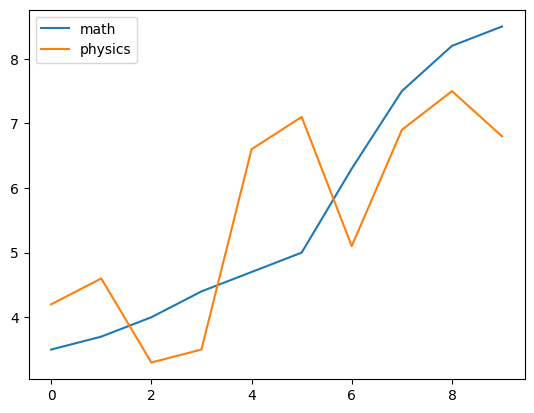

In [ ]:
df_spearman.sort_values("math").reset_index(drop=True).plot()
# math grows with physics, but it's not 100% of the time true, thats why we have a correlation coefficient of 0.7 not 1.0.

In [110]:
#Spearman using the formula, doing the calculation manually
df_spearman['rank_math'] = df_spearman['math'].rank()
df_spearman['rank_physics'] = df_spearman['physics'].rank()

df_spearman

math  physics  rank_math  rank_physics
student                                        
1         4.7      6.6        5.0           6.0
2         6.3      5.1        7.0           5.0
3         7.5      6.9        8.0           8.0
4         5.0      7.1        6.0           9.0
5         4.4      3.5        4.0           2.0
6         3.7      4.6        2.0           4.0
7         8.5      6.8       10.0           7.0
8         8.2      7.5        9.0          10.0
9         3.5      4.2        1.0           3.0
10        4.0      3.3        3.0           1.0

In [111]:
df_spearman['rank_diff'] = df_spearman['rank_math'] - df_spearman['rank_physics']

df_spearman

math  physics  rank_math  rank_physics  rank_diff
student                                                   
1         4.7      6.6        5.0           6.0       -1.0
2         6.3      5.1        7.0           5.0        2.0
3         7.5      6.9        8.0           8.0        0.0
4         5.0      7.1        6.0           9.0       -3.0
5         4.4      3.5        4.0           2.0        2.0
6         3.7      4.6        2.0           4.0       -2.0
7         8.5      6.8       10.0           7.0        3.0
8         8.2      7.5        9.0          10.0       -1.0
9         3.5      4.2        1.0           3.0       -2.0
10        4.0      3.3        3.0           1.0        2.0

In [112]:
df_spearman['rank_diff_squared'] = df_spearman['rank_diff'] ** 2

df_spearman

math  physics  rank_math  rank_physics  rank_diff  rank_diff_squared
student                                                                      
1         4.7      6.6        5.0           6.0       -1.0                1.0
2         6.3      5.1        7.0           5.0        2.0                4.0
3         7.5      6.9        8.0           8.0        0.0                0.0
4         5.0      7.1        6.0           9.0       -3.0                9.0
5         4.4      3.5        4.0           2.0        2.0                4.0
6         3.7      4.6        2.0           4.0       -2.0                4.0
7         8.5      6.8       10.0           7.0        3.0                9.0
8         8.2      7.5        9.0          10.0       -1.0                1.0
9         3.5      4.2        1.0           3.0       -2.0                4.0
10        4.0      3.3        3.0           1.0        2.0                4.0

In [113]:
1 - ((6 * df_spearman['rank_diff_squared'].sum()) / (df_spearman.shape[0]**3 - df_spearman.shape[0])) #Spearman Coefficient

np.float64(0.7575757575757576)

In [114]:
# Pearson Coefficient
df_pearson = pd.read_csv("../Data/data_statistics/income_education.csv")

df_pearson

years_education  family_income
0                4.8            992
1                5.2            891
2                5.3            951
3                5.3            824
4                5.4            739
..               ...            ...
97               8.6           3438
98               8.7           4303
99               8.7           3277
100              8.8           3125
101              9.2           3931

[102 rows x 2 columns]

In [115]:
df_pearson.describe()

years_education  family_income
count       102.000000     102.000000
mean          6.968627    1808.068627
std           1.004246     960.193197
min           4.800000     148.000000
25%           6.200000    1100.250000
50%           6.900000    1521.000000
75%           7.700000    2291.500000
max           9.200000    5123.000000

<Axes: xlabel='years_education', ylabel='family_income'>

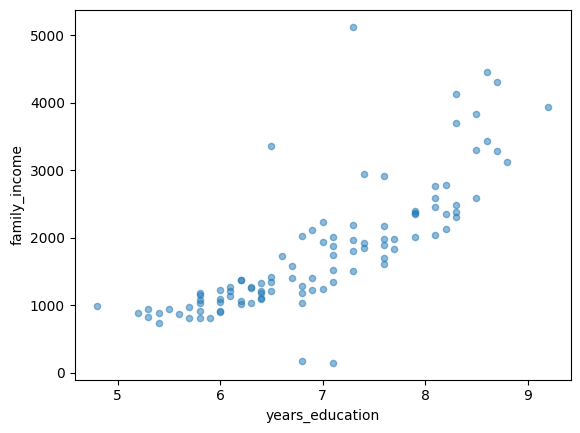

In [119]:
df_pearson.plot.scatter(x='years_education', y='family_income', alpha=0.5)

<Axes: xlabel='years_education', ylabel='family_income'>

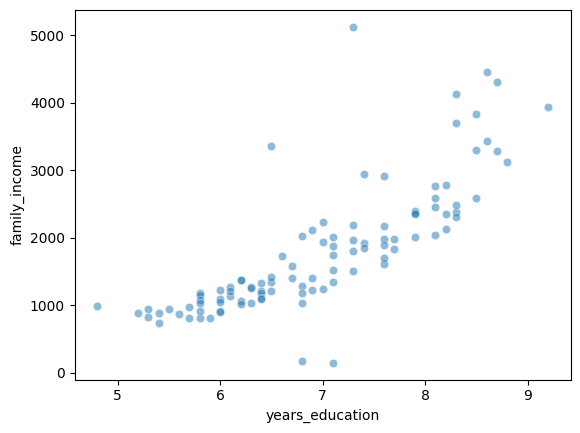

In [120]:
sns.scatterplot(data = df_pearson, x='years_education', y='family_income', alpha=0.5)

In [121]:
df_pearson.cov()

years_education  family_income
years_education         1.008511     760.782372
family_income         760.782372  921970.975442

In [ ]:
df_pearson.corr() #not passing the method, it will use pearson by default

years_education  family_income
years_education         1.000000       0.788972
family_income           0.788972       1.000000

In [126]:
from scipy.stats import linregress
result = linregress(df_pearson['years_education'], df_pearson['family_income'])

result

LinregressResult(slope=np.float64(754.3620207744607), intercept=np.float64(-3448.7992584949684), rvalue=np.float64(0.7889718417802907), pvalue=np.float64(7.054117802427208e-23), stderr=np.float64(58.74761882230723), intercept_stderr=np.float64(413.57819685417434))

### Introduction to Linear Regression

In [127]:
result

LinregressResult(slope=np.float64(754.3620207744607), intercept=np.float64(-3448.7992584949684), rvalue=np.float64(0.7889718417802907), pvalue=np.float64(7.054117802427208e-23), stderr=np.float64(58.74761882230723), intercept_stderr=np.float64(413.57819685417434))

In [ ]:
coef_determination = result.rvalue ** 2
coef_determination
# means that 62% of the variation in family income is explained by the years of education   
# 38% of the variation is explained by other factors

np.float64(0.622476567122184)

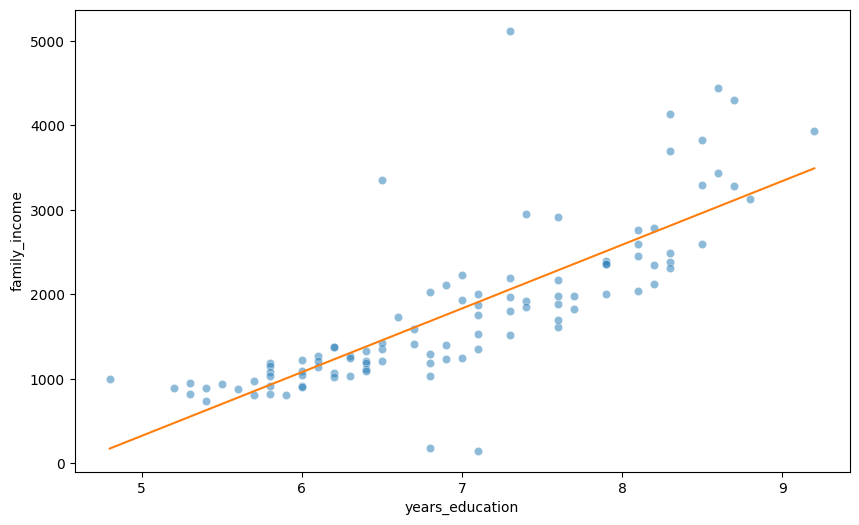

In [137]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data = df_pearson, x='years_education', y='family_income', ax=ax, alpha=0.5)

ax.plot(
    df_pearson['years_education'],
    result.intercept + result.slope * df_pearson['years_education'],
    color='C1'
)

plt.show()

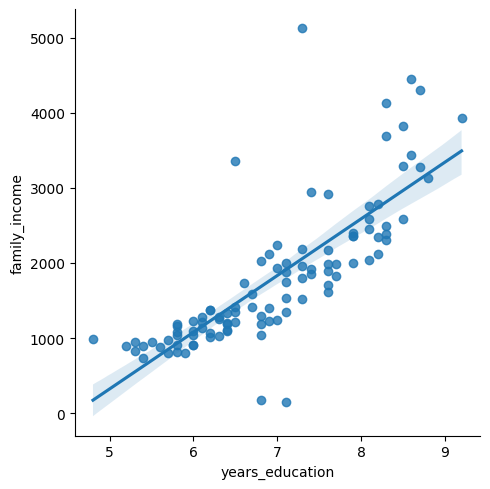

In [138]:
sns.lmplot(data=df_pearson, x='years_education', y='family_income')